In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [4]:
from inference.sample import StockSampler

m=4

sampler = StockSampler(array, tickers, dates, m=m)

In [5]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [6]:
sampler.x.shape

(49073, 10)

In [7]:
observation_limit = sampler.n -1000
sampler.sample(100, observation_limit = observation_limit)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.17s/it]


In [8]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

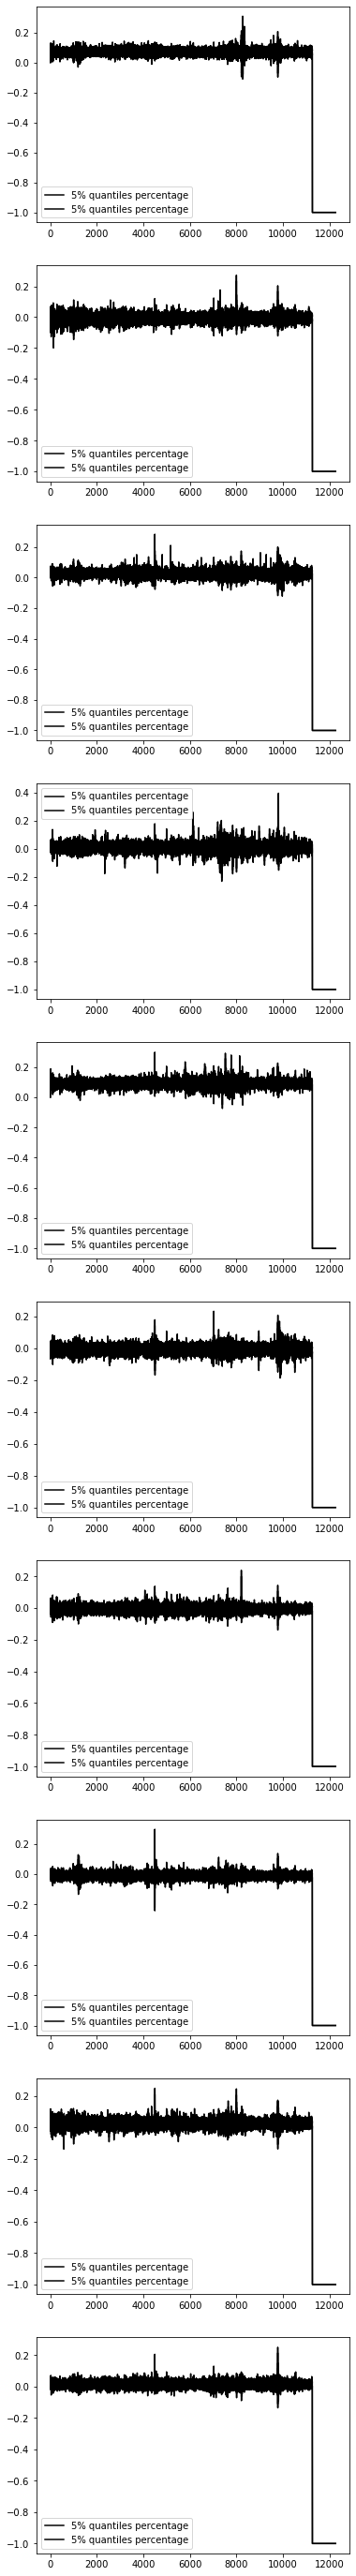

In [9]:
analyser.plot_quantiles_percentage()

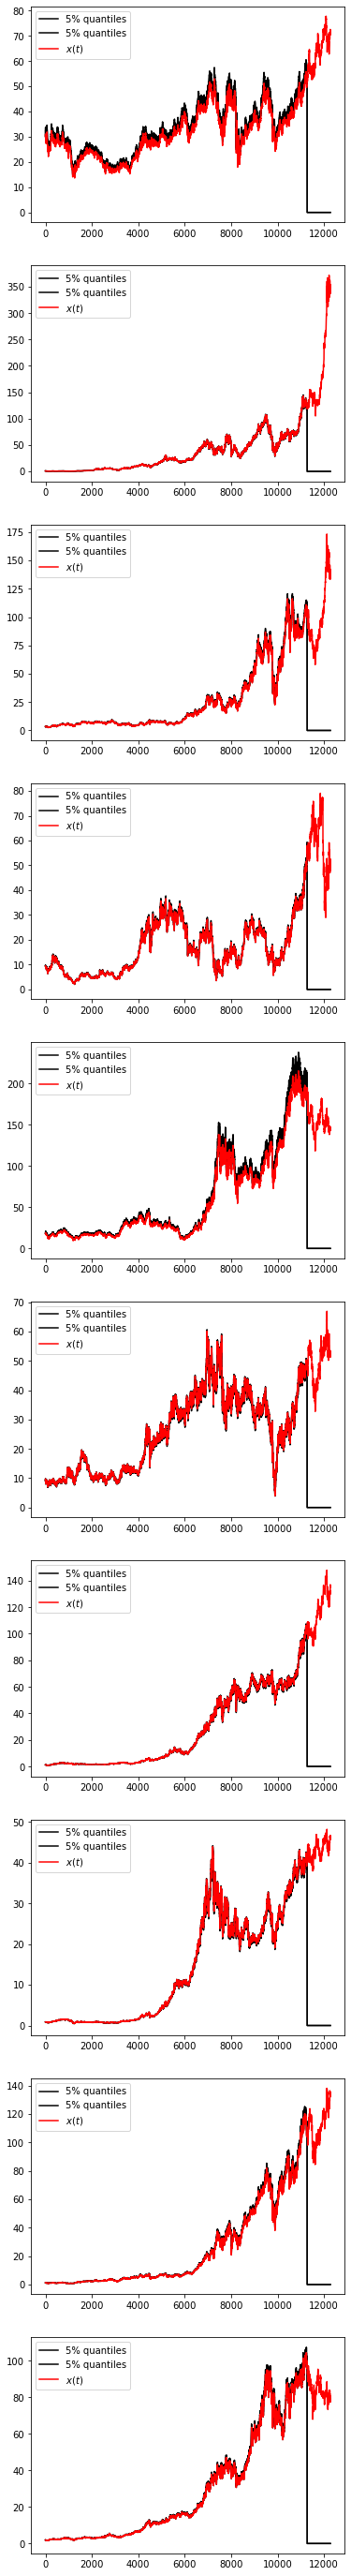

In [10]:
analyser.plot_quantiles()

In [11]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

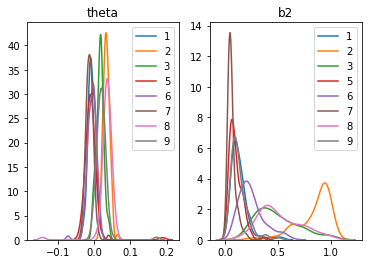

In [12]:
analyser.plot_parameter_distributions(observed_tickers)

In [13]:
sampler.predict_samples(n_predict = 1000, x0=sampler.prices_array[observation_limit])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.27it/s]


In [14]:
sampler.prices_array[-1000]

array([ 53.83000183, 125.90000153, 108.23000336,  57.25      ,
       190.75      ,  49.29000092, 104.41999817,  41.66999817,
       108.90000153,  98.91999817])

In [15]:
predictions = sampler.predicted_samples

In [16]:
np.mean(predictions, axis=0)[:,0]

array([ 5.38300018e+01,  5.72966008e+01,  6.28838305e+01,  6.74112410e+01,
        7.31503358e+01,  8.22164948e+01,  9.12305848e+01,  1.00765019e+02,
        1.07606102e+02,  1.20773171e+02,  1.32841974e+02,  1.44228358e+02,
        1.55529888e+02,  1.73141942e+02,  1.87334537e+02,  2.02855220e+02,
        2.13294516e+02,  2.10949726e+02,  2.23528714e+02,  2.50816767e+02,
        2.82095190e+02,  3.14991912e+02,  3.06234059e+02,  3.25788129e+02,
        3.61339949e+02,  3.93092571e+02,  4.17824004e+02,  4.64994142e+02,
        4.81601765e+02,  5.63870756e+02,  6.22356223e+02,  6.97552897e+02,
        7.44990776e+02,  8.33916313e+02,  9.29364328e+02,  1.01473268e+03,
        9.92155874e+02,  1.05229420e+03,  1.17471955e+03,  1.22043123e+03,
        1.16700603e+03,  1.24878761e+03,  1.18121391e+03,  1.54268872e+03,
        1.75752934e+03,  2.10814270e+03,  2.43276894e+03,  2.56868661e+03,
        2.24505836e+03,  2.42590694e+03,  2.68506452e+03,  3.35898928e+03,
        3.31384527e+03,  

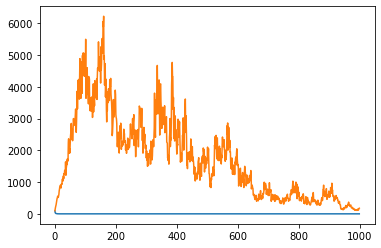

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.percentile(predictions[:,:,9], [2.5,97.5], axis=0).T)

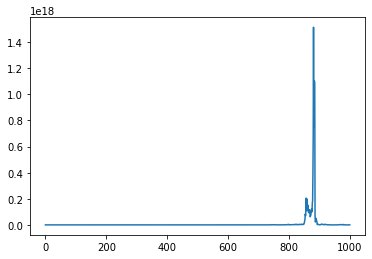

In [18]:
plt.plot(np.mean(predictions, axis=0)[:,0])

In [19]:
data.shape

NameError: name 'data' is not defined